# Laboratorio di simulazione numerica

In [25]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
import numpy as np
import math
import string
from scipy.optimize import curve_fit

### Exercise 01.1

In this exercise I tested the random number generator, drawing a set of uniformly distributed numbers.
These numbers were divided in blocks, and for each block $n$ I calculated an average value $x_n$; from the sequence of $x_n$. then, I calculated the average and variance of the overall set as the number of blocks increased.
Lastly, I did a chi-squared test on each block. The results are plotted below. The red dotted line marks the expected value of $\frac12$ for reference.

In [26]:
prefix = "exercise01-1/"

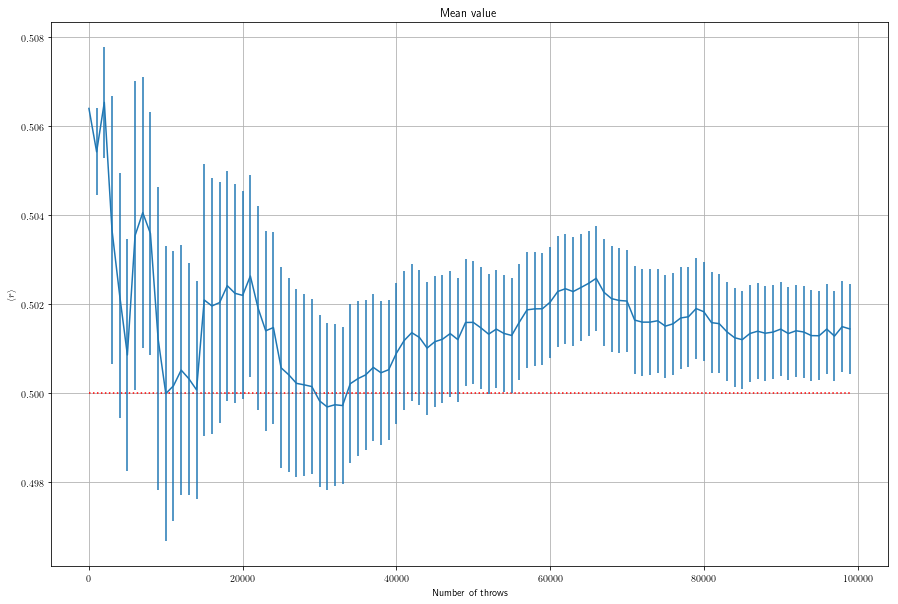

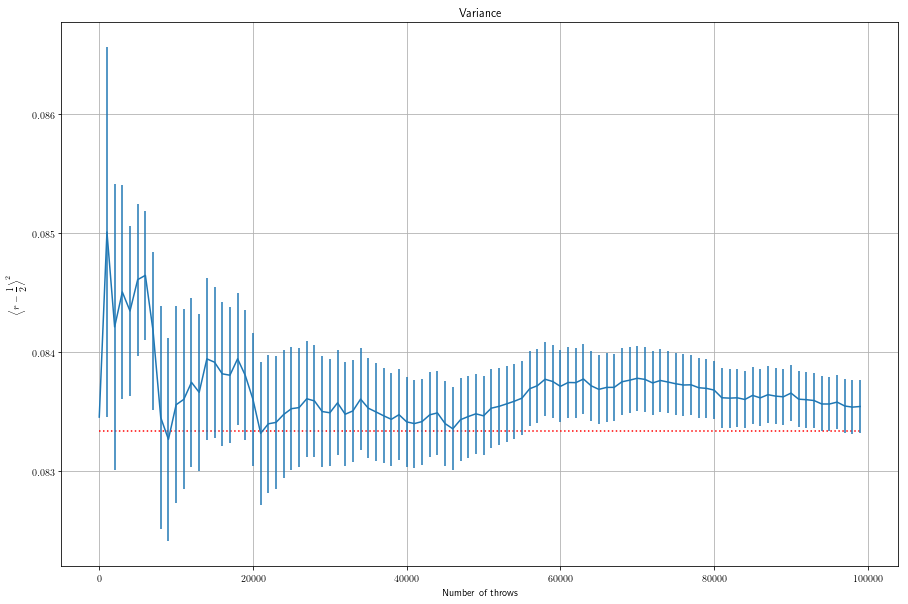

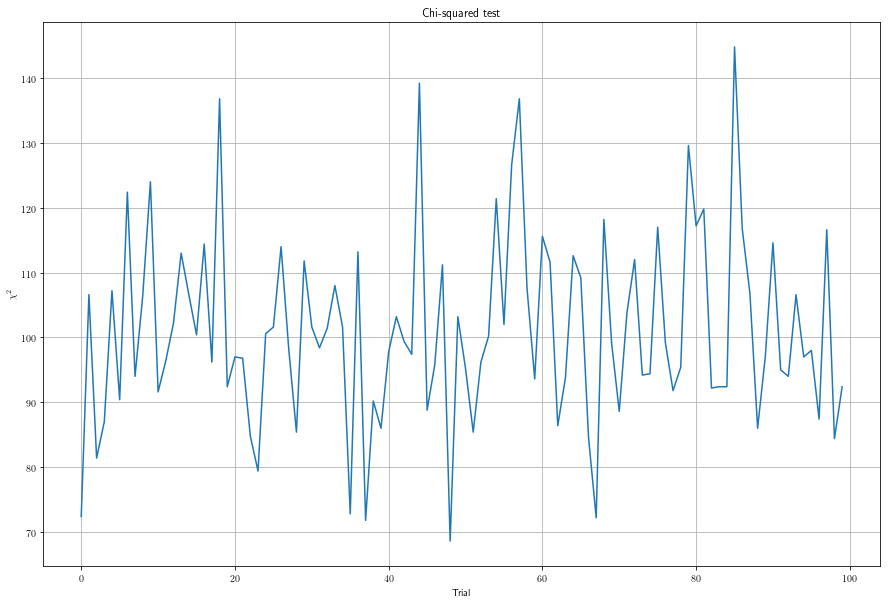

In [27]:
## Mean value

# Data collection
filename = prefix + "uniformd-average.dat";
n_throws, mean_avg, mean_std = np.loadtxt(filename, delimiter = " ", unpack = True)

# Plot
plt.figure(1, figsize = (15,10))
plt.hlines(1/2, 0, n_throws[-1], colors = "red", linestyle = "dotted")
plt.errorbar(n_throws, mean_avg, yerr = mean_std)
plt.title("Mean value")
plt.xlabel(r"Number of throws")
plt.ylabel(r"$\displaystyle\langle r\rangle$")
plt.grid(True)

## Variance

# Data collection
filename = prefix + "uniformd-variance.dat";
n_throws, variance_avg, variance_std = np.loadtxt(filename, delimiter = " ", unpack = True)

# Plot
plt.figure(2, figsize = (15,10))
plt.hlines(1/12, 0, n_throws[-1], colors = "red", linestyle = "dotted")
plt.errorbar(n_throws, variance_avg, yerr = variance_std)
plt.title("Variance")
plt.xlabel("Number of throws")
plt.ylabel(r"$\displaystyle\Bigl\langle r-\frac12\Bigr\rangle^2$")
plt.grid(True)

## Chi-squared test

# Data collection
filename = prefix + "uniformd-chisquared-test.dat";
trials, chisquared = np.loadtxt(filename, delimiter = " ", unpack = True)

plt.figure(3, figsize = (15,10))
plt.plot(trials, chisquared)
plt.title("Chi-squared test")
plt.xlabel("Trial")
plt.ylabel(r"$\chi^2$")
plt.grid(True)

plt.show()

### Exercise 01.2

In this exercise I tested the result of taking the average of a large quantity of random numbers drawn from the same distribution.
More precisely, for each distribution I took the average of a fixed quantity $N$ (here equal to 10000) of numbers, each of which was itself the average of a set (of size $M$) of numbers generated from the same distribution.
I plotted the results below, varying the size $M$.

The first two distributions, the uniform one and the exponential one, have a finite variance, therefore the average should follow, from the central limit theorem, a normal distribution.
The last one is a Cauchy-Lorentz distribution, to which the previous theorem does not apply; however this distribution is stable, so the average should follow the Cauchy-Lorentz distribution too.

That this happens is evident for the blue plots, in which an average of 100 "blocks" was taken.
I fitted a normal distribution density function (for the first two) and a Cauchy-Lorentz density function (for the last) to the histograms with the highest $M$.

In [28]:
colors = ["firebrick", "darkorange", "limegreen", "royalblue"]
prefix = "exercise01-2/"

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


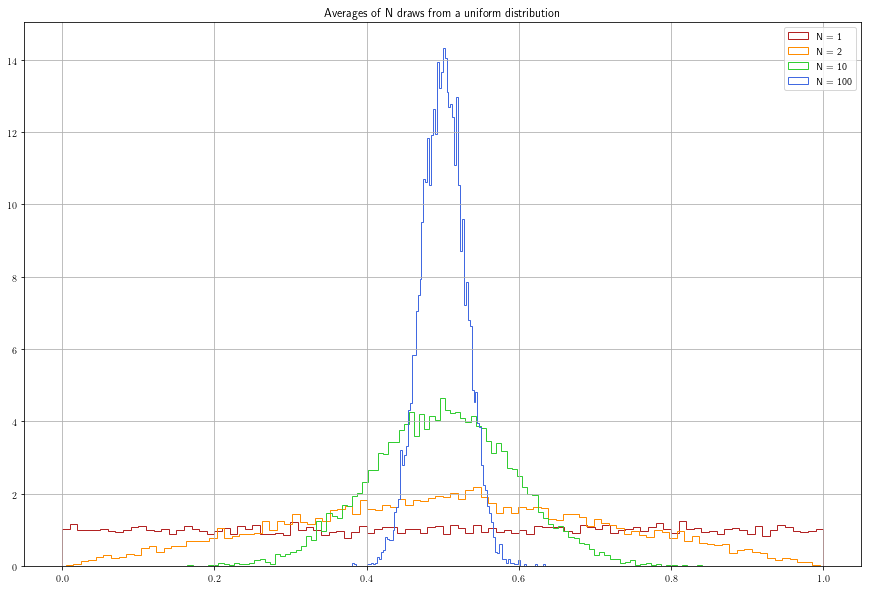

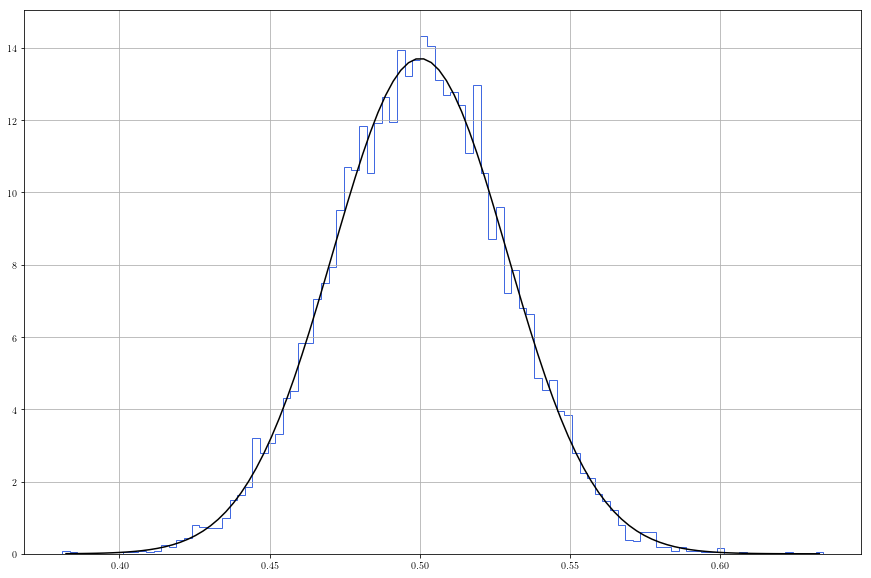

The fitted normal distribution has a mean value of 5.00e-01 +- 2.68e-04 and a variance of 8.47e-04 +- 1.27e-05.


In [29]:
## Uniform distribution

# Data collection
filename = prefix + "central-limit-theorem-uniformd.dat"
n_bins = 100

# The first row contains the number of draws used to compute the average
with open(filename) as f:
    n_draws = f.readline().strip()
    # 'strip()' removes the trailing newline element that would otherwise
    # be included in the list.
n_draws = n_draws.split()
d0, d1, d2, d3 = np.loadtxt(filename, skiprows = 1, unpack = True)

# Plot
# The histograms are normalized (with 'density = True') to a total area of 1.
plt.figure(1, figsize = (15,10))
plt.hist(d0, bins = n_bins, label = "N = " + n_draws[0], density = True, color = colors[0], histtype = "step")
plt.hist(d1, bins = n_bins, label = "N = " + n_draws[1], density = True, color = colors[1], histtype = "step")
plt.hist(d2, bins = n_bins, label = "N = " + n_draws[2], density = True, color = colors[2], histtype = "step")
# We need to save the results of the histogram for the gaussian fit below.
bin_values, bins, patches = plt.hist(d3, bins = n_bins, label = "N = " + n_draws[3], density = True, color = colors[3], histtype = "step")
plt.title("Averages of N draws from a uniform distribution")
plt.grid(True)
plt.legend()

# Gaussian fit (d3 only)
plt.figure(2, figsize = (15,10))
def gauss(x, mean, variance):
    return 1 / np.sqrt(2 * np.pi * variance) * np.exp(-(x - mean)**2 / (2 * variance))

# From 'bins' create an array that contains the centre of each bin
bin_centres = [0.5 * (bins[i + 1] + bins[i]) for i in range(len(bins) - 1)]

optimal_values, covariance_matrix = curve_fit(gauss, bin_centres, bin_values, p0 = (1/2, 1))
plt.hist(d3, bins = n_bins, label = "N = " + n_draws[3], density = True, color = colors[3], histtype = "step")
plt.plot(bin_centres, [gauss(x, optimal_values[0], optimal_values[1]) for x in bin_centres], color = "black")
plt.grid(True)

plt.show()

print("The fitted normal distribution has a mean value of "
      + "{:.2e}".format(optimal_values[0]) + " +- " + "{:.2e}".format(np.sqrt(covariance_matrix[0][0]))
      + " and a variance of "
      + "{:.2e}".format(optimal_values[1]) + " +- " + "{:.2e}".format(np.sqrt(covariance_matrix[1][1]))
      + ".")

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


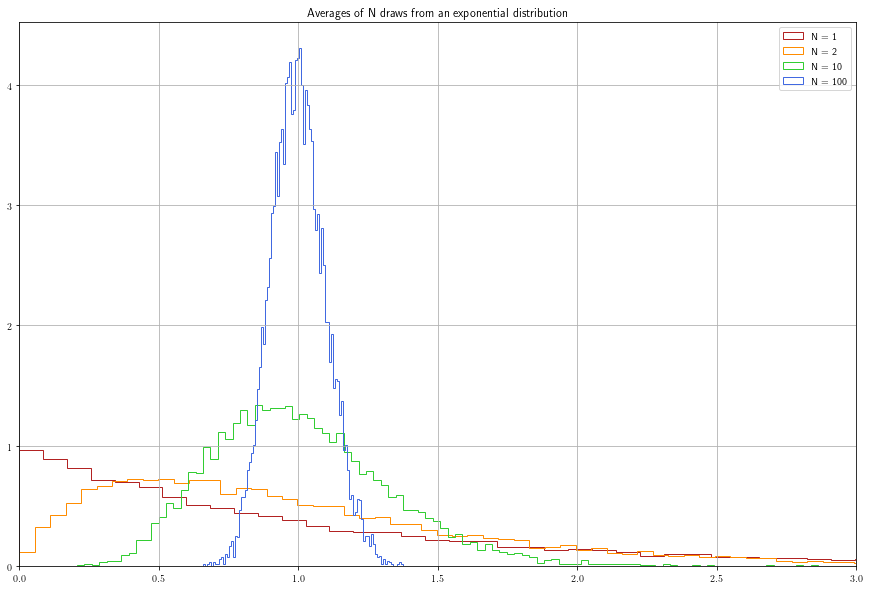

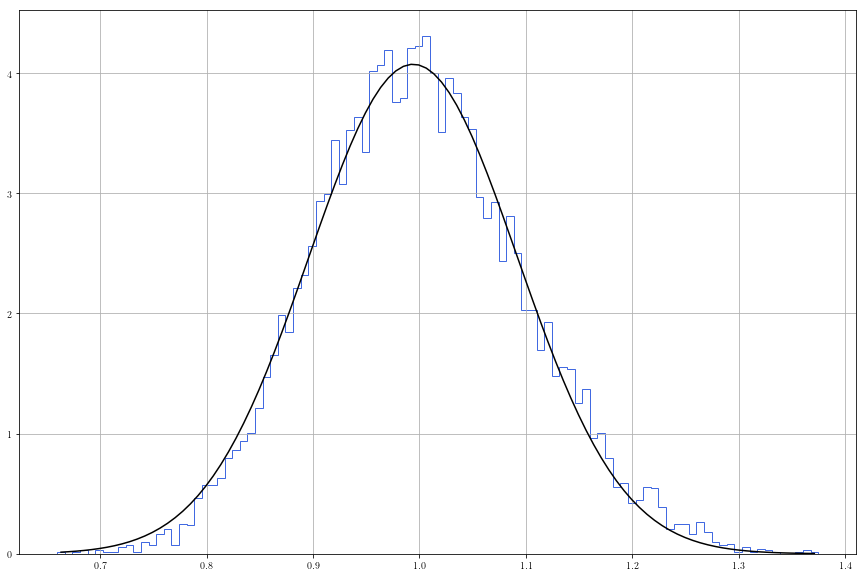

The fitted normal distribution has a mean value of 9.94e-01 +-1.07e-03 and a variance of 9.59e-03 +-1.71e-04.


In [30]:
## Exponential distribution

# Data collection
filename = prefix + "central-limit-theorem-exponentiald.dat"
n_bins = 100

# The first row contains the number of draws used to compute the average
with open(filename) as f:
    n_draws = f.readline().strip()
    # 'strip()' removes the trailing newline element that would otherwise
    # be included in the list.
n_draws = n_draws.split()
# 'unpack' transposes the matrix.
d0, d1, d2, d3 = np.loadtxt(filename, skiprows = 1, unpack = True)

# Plot
# The histograms are normalized (with 'density = True') to a total area of 1.
plt.figure(1, figsize = (15,10))
plt.hist(d0, bins = n_bins, label = "N = " + n_draws[0], density = True, color = colors[0], histtype = "step")
plt.hist(d1, bins = n_bins, label = "N = " + n_draws[1], density = True, color = colors[1], histtype = "step")
plt.hist(d2, bins = n_bins, label = "N = " + n_draws[2], density = True, color = colors[2], histtype = "step")
bin_values, bins, patches = plt.hist(d3, bins = n_bins, label = "N = " + n_draws[3], density = True, color = colors[3], histtype = "step")
plt.title("Averages of N draws from an exponential distribution")
plt.xlim(0, 3)
plt.grid(True)
plt.legend()

# Gaussian fit (d3 only)
plt.figure(2, figsize = (15,10))
def gauss(x, mean, variance):
    return 1 / np.sqrt(2 * np.pi * variance) * np.exp(-(x - mean)**2 / (2 * variance))

# From 'bins' create an array that contains the centre of each bin
bin_centres = [0.5 * (bins[i + 1] + bins[i]) for i in range(len(bins) - 1)]

optimal_values, covariance_matrix = curve_fit(gauss, bin_centres, bin_values)
plt.hist(d3, bins = n_bins, label = "N = " + n_draws[3], density = True, color = colors[3], histtype = "step")
plt.plot(bin_centres, [gauss(x, optimal_values[0], optimal_values[1]) for x in bin_centres], color = "black")
plt.grid(True)

plt.show()

print("The fitted normal distribution has a mean value of "
      + "{:.2e}".format(optimal_values[0]) + " +-" + "{:.2e}".format(np.sqrt(covariance_matrix[0][0]))
      + " and a variance of "
      + "{:.2e}".format(optimal_values[1]) + " +-" + "{:.2e}".format(np.sqrt(covariance_matrix[1][1])) 
      + ".")

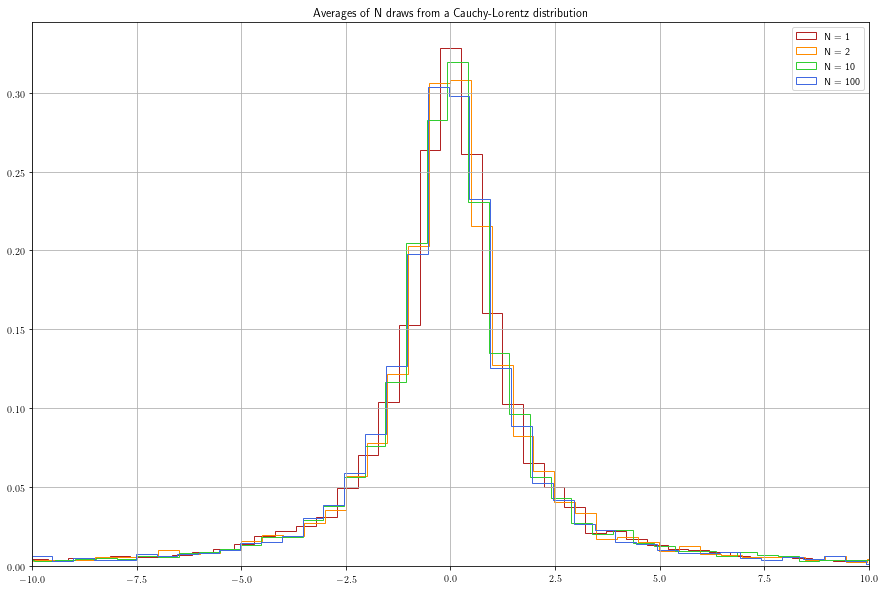

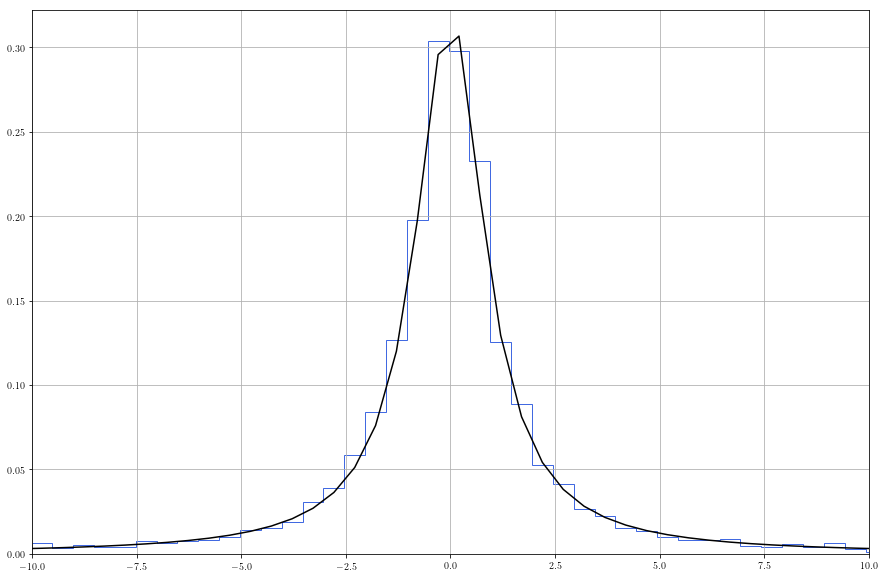

The fitted Cauchy-Lorentz distribution has a median of -6.15e-03 +- 7.43e-03 and a scale parameter of 9.94e-01 +- 7.46e-03.


In [32]:
## Cauchy-Lorentz distribution

# Data collection
filename = prefix + "central-limit-theorem-cauchylorentzd.dat"
n_bins = 100

# Data collection
# The first row contains the number of draws used to compute the average
with open(filename) as f:
    n_draws = f.readline().strip()
    # 'strip()' removes the trailing newline element that would otherwise
    # be included in the list.
n_draws = n_draws.split()
# 'unpack' transposes the matrix.
data = np.loadtxt(filename, skiprows = 1, unpack = True)

# Plot
# Unfortunately it happens that some numbers are way too high, and as a result
# the histogram is poorly drawn since the other numbers are compressed in few
# bins. For this reason we exclude them from the plot; this should not change
# the distribution in a signficant way.
lim_sup = 25
out_of_bounds_indices = []
clean_data = []
for data_list in data:
    for i in range(len(data_list)):
        if(abs(data_list[i]) > lim_sup):
            out_of_bounds_indices.append(i)
    clean_data.append(np.delete(data_list, out_of_bounds_indices))

# The histograms are normalized (with 'density = True') to a total area of 1.
plt.figure(1, figsize = (15,10))
plt.hist(clean_data[0], bins = n_bins, label = "N = " + n_draws[0], density = True, color = colors[0], histtype = "step")
plt.hist(clean_data[1], bins = n_bins, label = "N = " + n_draws[1], density = True, color = colors[1], histtype = "step")
plt.hist(clean_data[2], bins = n_bins, label = "N = " + n_draws[2], density = True, color = colors[2], histtype = "step")
bin_values, bins, patches = plt.hist(clean_data[3], bins = n_bins, label = "N = " + n_draws[3], density = True, color = colors[3], histtype = "step")
plt.title("Averages of N draws from a Cauchy-Lorentz distribution")
plt.xlim(-10, 10)
plt.grid(True)
plt.legend()

# Cauchy-Lorentz fit (d3 only)
plt.figure(2, figsize = (15,10))
def cauchylorentz(x, median, scale):
    return 1 / np.pi * scale / ((x - median)**2 + scale**2)

# From 'bins' create an array that contains the centre of each bin
bin_centres = [0.5 * (bins[i + 1] + bins[i]) for i in range(len(bins) - 1)]

optimal_values, covariance_matrix = curve_fit(cauchylorentz, bin_centres, bin_values)
plt.hist(clean_data[3], bins = n_bins, label = "N = " + n_draws[3], density = True, color = colors[3], histtype = "step")
plt.plot(bin_centres, [cauchylorentz(x, optimal_values[0], optimal_values[1]) for x in bin_centres], color = "black")
plt.xlim(-10, 10)
plt.grid(True)

plt.show()

print("The fitted Cauchy-Lorentz distribution has a median of "
      + "{:.2e}".format(optimal_values[0], 4) + " +- " + "{:.2e}".format(np.sqrt(covariance_matrix[0][0]))
      + " and a scale parameter of "
      + "{:.2e}".format(optimal_values[1], 4) + " +- " + "{:.2e}".format(np.sqrt(covariance_matrix[1][1])) 
      + ".")

### Exercise 01.3

In this exercise I simulated Buffon's experiment to compute an approximation of the value of $\pi$.

I simulated the throw of a stick of length $L$ on a "floor" on which parallel lines, at a fixed distance $d$ each one from the next one, were drawn.
The number $N_\mathrm{hits}$ of times in which the stick crossed a line agains the total number $N_\mathrm{throws}$ of tries give an estimate of $\pi$ from the formula
$$
\pi\approx\frac{2LN_\mathrm{throws}}{N_\mathrm{hits}d}.
$$

Fixing $N_\mathrm{throws}$ to 10000, I repeated the simulation 100 times, each time computing the average value and the standard deviation of the set of estimates I had obtained.
As the size of the set increased, the average value got close to the real value of $\pi$, while the standard deviation slowly decreased, as expected. The red dotted line marks the exact value of $\pi$ for reference.

The floor was modelled as the square $[0,10]\times[0,10]$, ruled by the lines at $x=n$ for integer $n$.
To simulate the throw, I assumed that the probability of getting a given value for the position of its centre and its orientation on the floor was uniform.
Firstly, I generated a couple of points $(x_1,x_2)$ which were the coordinates of an endpoint of the stick; secondly I generated a number in the unit disk[1] around the previous point, then I rescaled it along the line passing through $(x_1,x_2)$ and itself in order to have a point at distance $L$ from the first endpoint.
With this procedure I obtained the two ends of the stick, from which I could see if it crossed a line.

[1] In order to generate the point in the unit disk I generated first of all a point in the unit rectangle $[-1,1]\times[-1,1]$, with uniformly distributed coordinates, then I accepted it if its distance from the origin was less than 1, otherwise I rejected it and generated another.

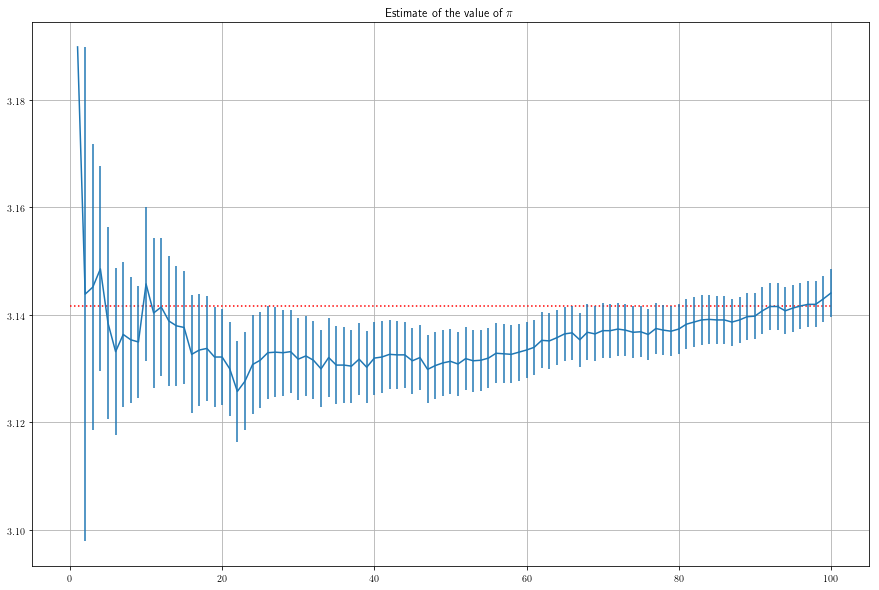

My estimate for pi is 3.14e+00 +- 4.43e-03.


In [31]:
# Data collection
filename = "exercise01-3/pi_estimate.dat"

estimate, std = np.loadtxt(filename, skiprows = 1, unpack = True)

plt.figure(figsize = (15,10))
plt.hlines(np.pi, 0, len(estimate), colors = "red", linestyle = "dotted")
plt.errorbar(range(1, len(estimate) + 1), estimate, yerr = std)
plt.title(r"Estimate of the value of $\pi$")
plt.grid(True)

plt.show()

print("My estimate for pi is "
      + "{:.2e}".format(estimate[-1]) + " +- " + "{:.2e}".format(std[-1])
      + ".")